In [ ]:
!pip install roboflow

from roboflow import Roboflow
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="zFQnSt2437Ig6aCAtSZ4", model_format="clip")
dataset = rf.workspace("yulia-pratiwi-45vut").project("derma").version(1).download(location="/content/Dermalysis")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/Dermalysis in clip:: 100%|██████████| 3495/3495 [00:01<00:00, 1760.35it/s]


In [ ]:
import os
os.chdir('/content/Dermalysis')

In [ ]:
import os

parent_path = '/content/Dermalysis/train'
print(os.listdir(parent_path))


['Cacar Air', 'KutuAir', 'CacarAir', 'Jerawat', '_tokenization.txt', 'JamurKuku', 'Kurap']


In [ ]:
os.makedirs('/content/Dermalysis/train', exist_ok=True)


In [ ]:
import os
folder_path = ('/content/Dermalysis/train/CacarAir')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
import os
folder_path = ('/content/Dermalysis/train/JamurKuku')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
import os
folder_path = ('/content/Dermalysis/train/Jerawat')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
import os
folder_path = ('/content/Dermalysis/train/Kurap')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
import os
folder_path = ('/content/Dermalysis/train/KutuAir')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
from pathlib import Path
image_dir = Path('/content/Dermalysis/train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(4)

Filepath      Label
0  /content/Dermalysis/train/JamurKuku/_39_4981_j...  JamurKuku
1  /content/Dermalysis/train/KutuAir/FU-athlete-f...    KutuAir
2  /content/Dermalysis/train/CacarAir/images-14-_...   CacarAir
3  /content/Dermalysis/train/CacarAir/chicken_pox...   CacarAir

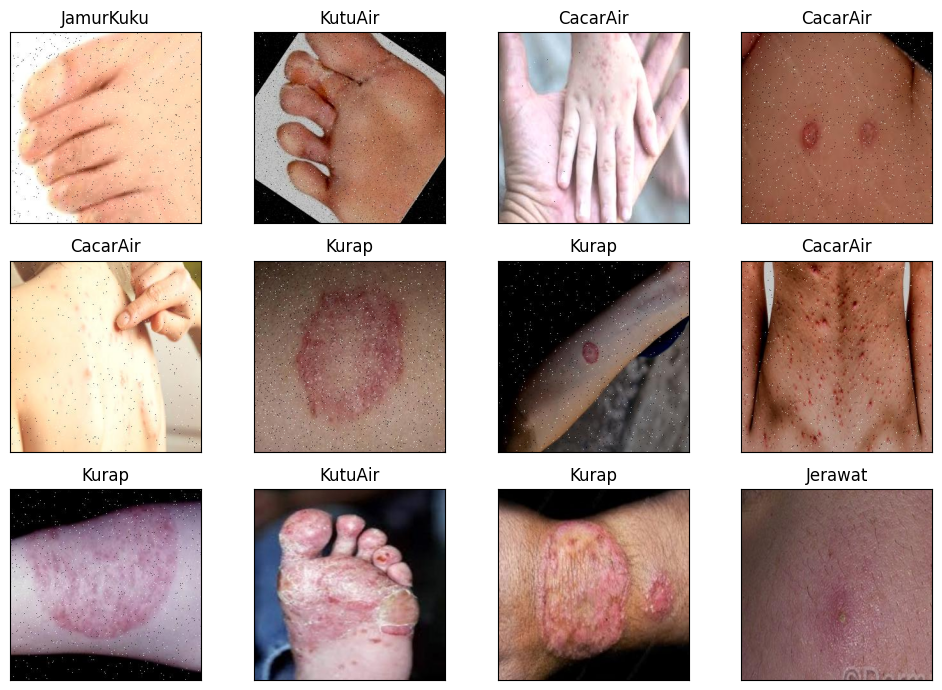

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



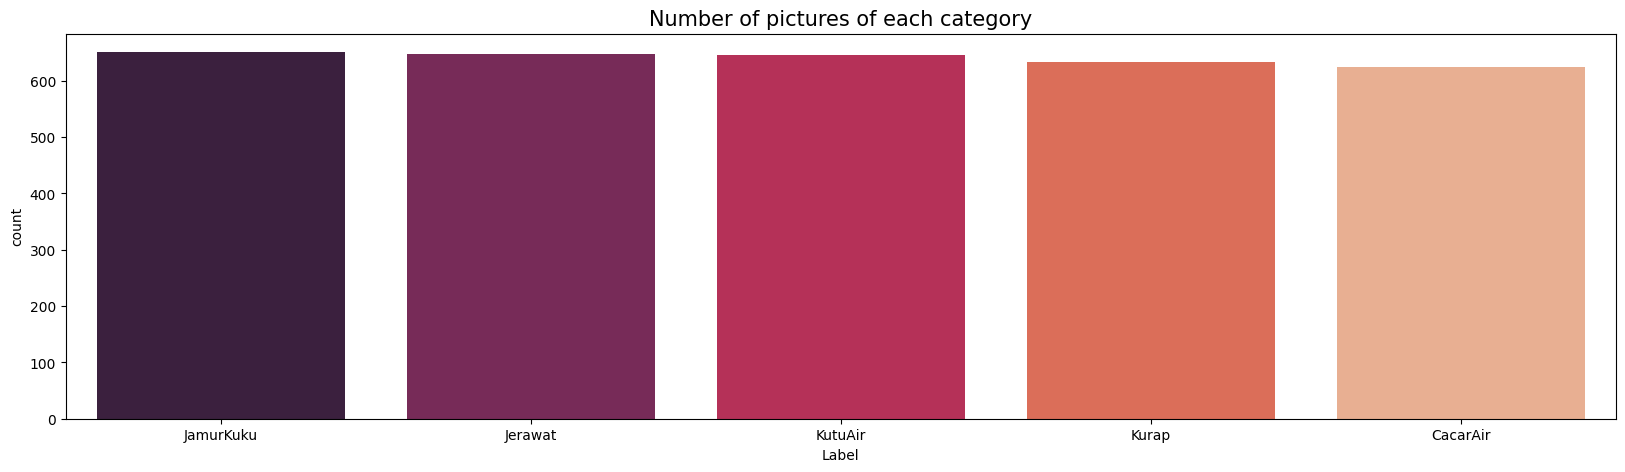

In [ ]:
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
#data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

validasi_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 2560 validated image filenames belonging to 5 classes.
Found 641 validated image filenames belonging to 5 classes.


In [ ]:
from keras import Model, Input
input_shape = (416,416,3)
model_input = Input(shape=input_shape)

In [ ]:
from keras.applications.densenet import DenseNet201
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import RMSprop

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import torchvision.models as models
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
denseNet = DenseNet201(input_shape=input_shape, input_tensor=model_input, include_top=False, weights="imagenet")

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
for layer in denseNet.layers:
    layer.trainable = False

In [ ]:
denseNet_last_output = denseNet.get_layer('relu').output

# Print informasi tentang output layer terakhir
print('Last layer output shape:', denseNet_last_output.shape)

Last layer output shape: (None, 13, 13, 1920)


In [ ]:
# Flatten the output layer to 1 dimension
x_denseNet = layers.GlobalMaxPooling2D()(denseNet_last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x_denseNet = layers.Dense(512, activation='relu')(x_denseNet)
# Add a dropout rate of 0.7
x_denseNet = layers.Dropout(0.15)(x_denseNet)
# Add a final sigmoid layer for classification
x_denseNet = layers.Dense(5, activation='softmax')(x_denseNet)

# Configure and compile the model

denseNet_model = Model(model_input, x_denseNet)
optimizer = RMSprop(learning_rate=0.0001)
denseNet_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
denseNet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 422, 422, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 208, 208, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 208, 208, 64)         256       ['conv1/conv[0][0]']      

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.1 and logs.get('val_loss') < 0.1):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
# Tentukan path penyimpanan model dengan ekstensi .keras
checkpoint_path = '/content/drive/MyDrive/Percobaan-Desnet201/Desnet201.h5'


# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan


In [ ]:
callbacks= myCallback()
history_denseNet = denseNet_model.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/16,
                  validation_steps=validasi_data.n/16,
                  epochs=10,
                  callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 1.4686 - accuracy: 0.5203
Epoch 1: val_loss improved from inf to 0.87380, saving model to /content/drive/MyDrive/Percobaan-Desnet201/Desnet201.h5


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


160/160 [==============================] - 186s 989ms/step - loss: 1.4686 - accuracy: 0.5203 - val_loss: 0.8738 - val_accuracy: 0.7020
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.7985 - accuracy: 0.7168
Epoch 2: val_loss improved from 0.87380 to 0.68770, saving model to /content/drive/MyDrive/Percobaan-Desnet201/Desnet201.h5
160/160 [==============================] - 161s 1s/step - loss: 0.7985 - accuracy: 0.7168 - val_loss: 0.6877 - val_accuracy: 0.7379
Epoch 3/10
160/160 [==============================] - ETA: 0s - loss: 0.6434 - accuracy: 0.7660
Epoch 3: val_loss improved from 0.68770 to 0.49225, saving model to /content/drive/MyDrive/Percobaan-Desnet201/Desnet201.h5
160/160 [==============================] - 152s 945ms/step - loss: 0.6434 - accuracy: 0.7660 - val_loss: 0.4922 - val_accuracy: 0.8284
Epoch 4/10
160/160 [==============================] - ETA: 0s - loss: 0.5789 - accuracy: 0.7895
Epoch 4: val_loss did not improve from 0.49225
160/160 [======

In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive"
PROJECT_NAME = "Percobaan-Densenet201"
SAVE_MODEL_NAME = "Densenet201.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
denseNet_model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/Percobaan-Densenet201/Densenet201.h5...


In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


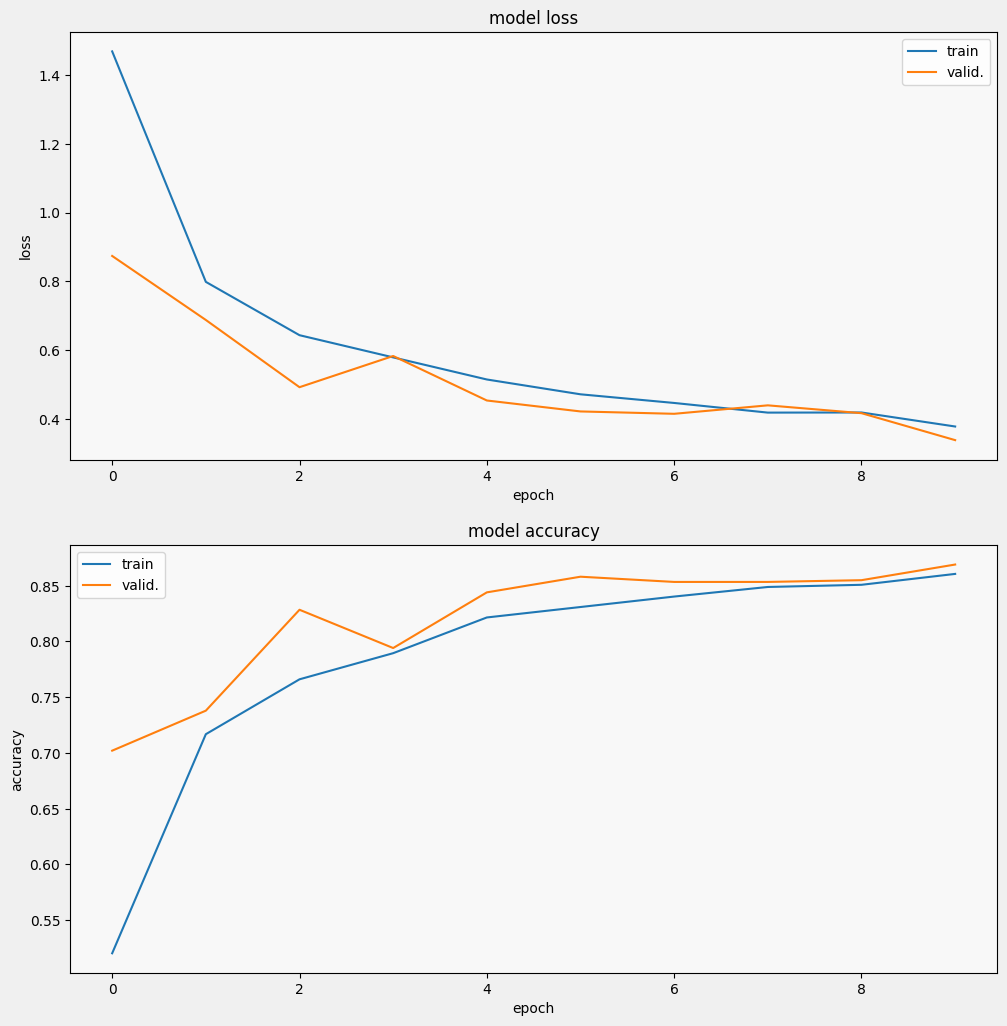

In [ ]:
#display
display_training_curves(
    history_denseNet.history['loss'],
    history_denseNet.history['val_loss'],
    'loss', 211)
display_training_curves(
    history_denseNet.history['accuracy'],
    history_denseNet.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Tentukan path ke data uji
test_data_path = "/content/Dermalysis/test"

# Buat instance ImageDataGenerator untuk data uji
test_datagen = ImageDataGenerator(rescale=1./255)

# Buat generator data uji
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(416, 416),  # Ukuran gambar yang sama dengan data pelatihan
    batch_size=16,
    class_mode=None,
    shuffle=False
)

# Prediksi label gambar uji
pred = denseNet_model.predict(test_generator)
pred = np.argmax(pred, axis=1)

# Peta indeks label ke nama kelas
labels = (train_data.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred_labels = [labels[k] for k in pred]

# Mendapatkan label asli dari data uji
true_labels = test_generator.classes
true_labels = [labels[k] for k in true_labels]


# Laporan Klasifikasi
print(classification_report(true_labels, pred_labels))



Found 278 images belonging to 5 classes.
18/18 [==============================] - 5s 257ms/step
              precision    recall  f1-score   support

    CacarAir       0.89      0.95      0.92        61
   JamurKuku       0.91      0.83      0.87        52
     Jerawat       0.91      0.96      0.94        53
       Kurap       0.90      0.76      0.82        58
     KutuAir       0.84      0.94      0.89        54

    accuracy                           0.89       278
   macro avg       0.89      0.89      0.89       278
weighted avg       0.89      0.89      0.89       278



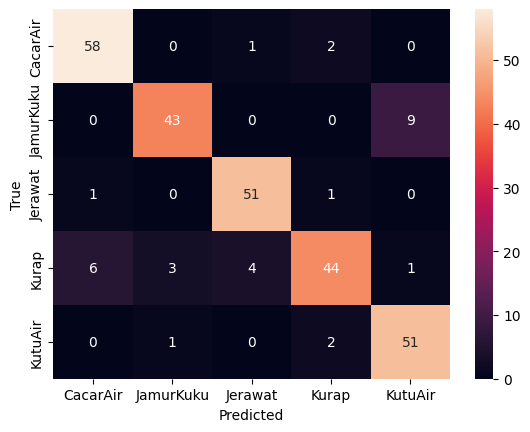

In [ ]:
# Matriks
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels.values(), yticklabels=labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

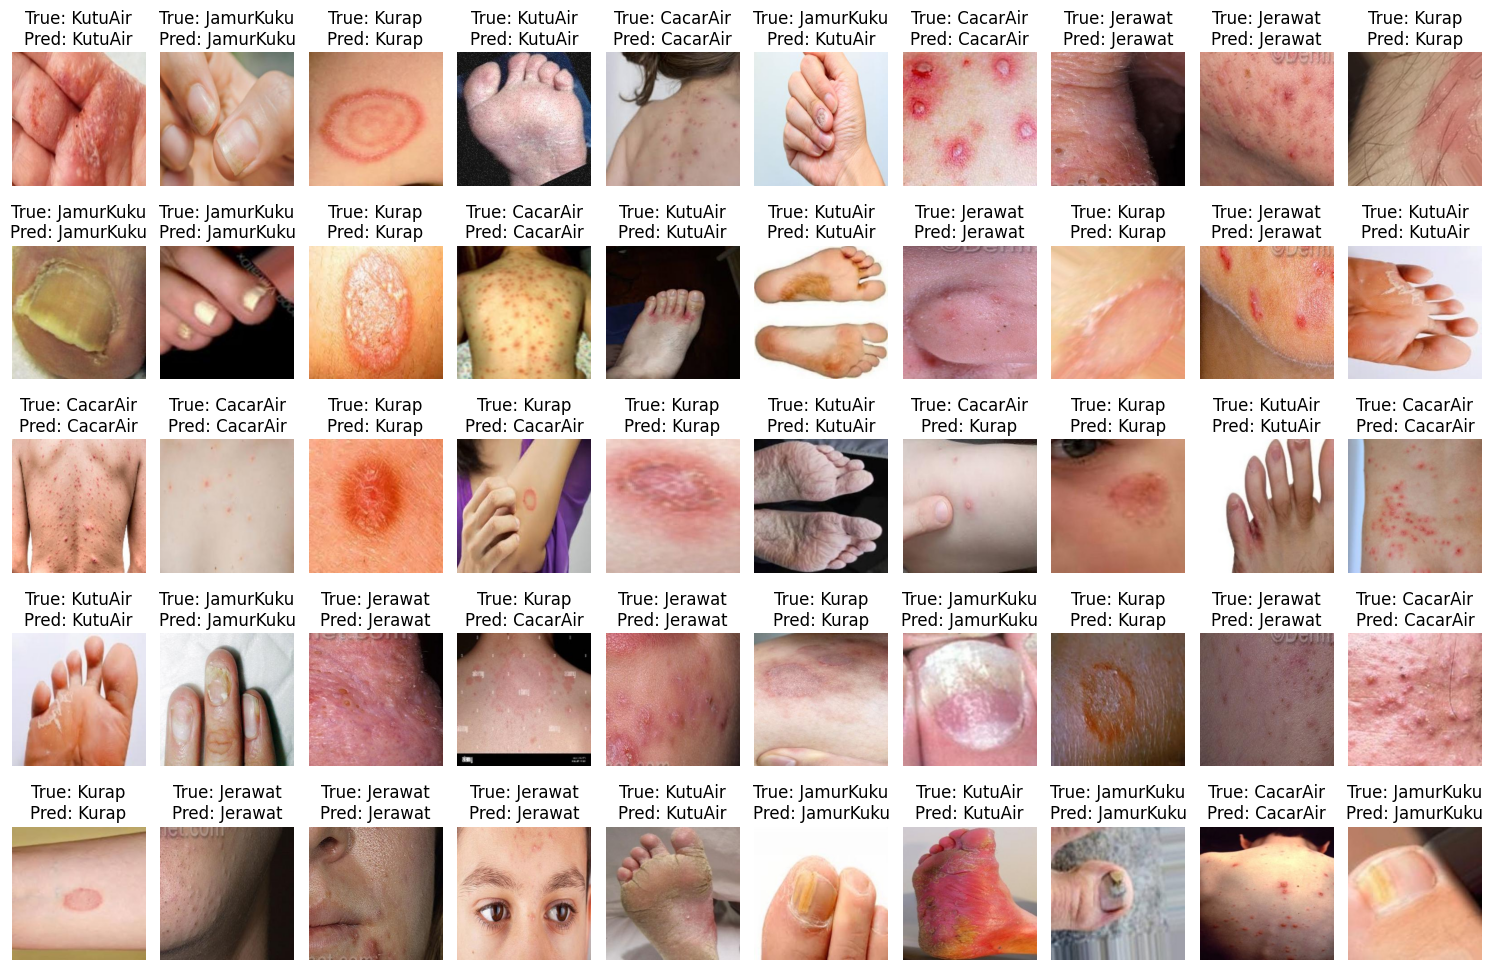

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil beberapa contoh gambar dan prediksinya
num_rows = 5
num_cols = 10
num_images = num_rows * num_cols

indices = np.random.choice(len(pred_labels), num_images, replace=False)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, idx in enumerate(indices):
    row = i // num_cols
    col = i % num_cols

    img_path = test_generator.filepaths[idx]
    img = plt.imread(img_path)
    true_label = true_labels[idx]
    pred_label = pred_labels[idx]

    axes[row, col].imshow(img)
    axes[row, col].set_title(f'True: {true_label}\nPred: {pred_label}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


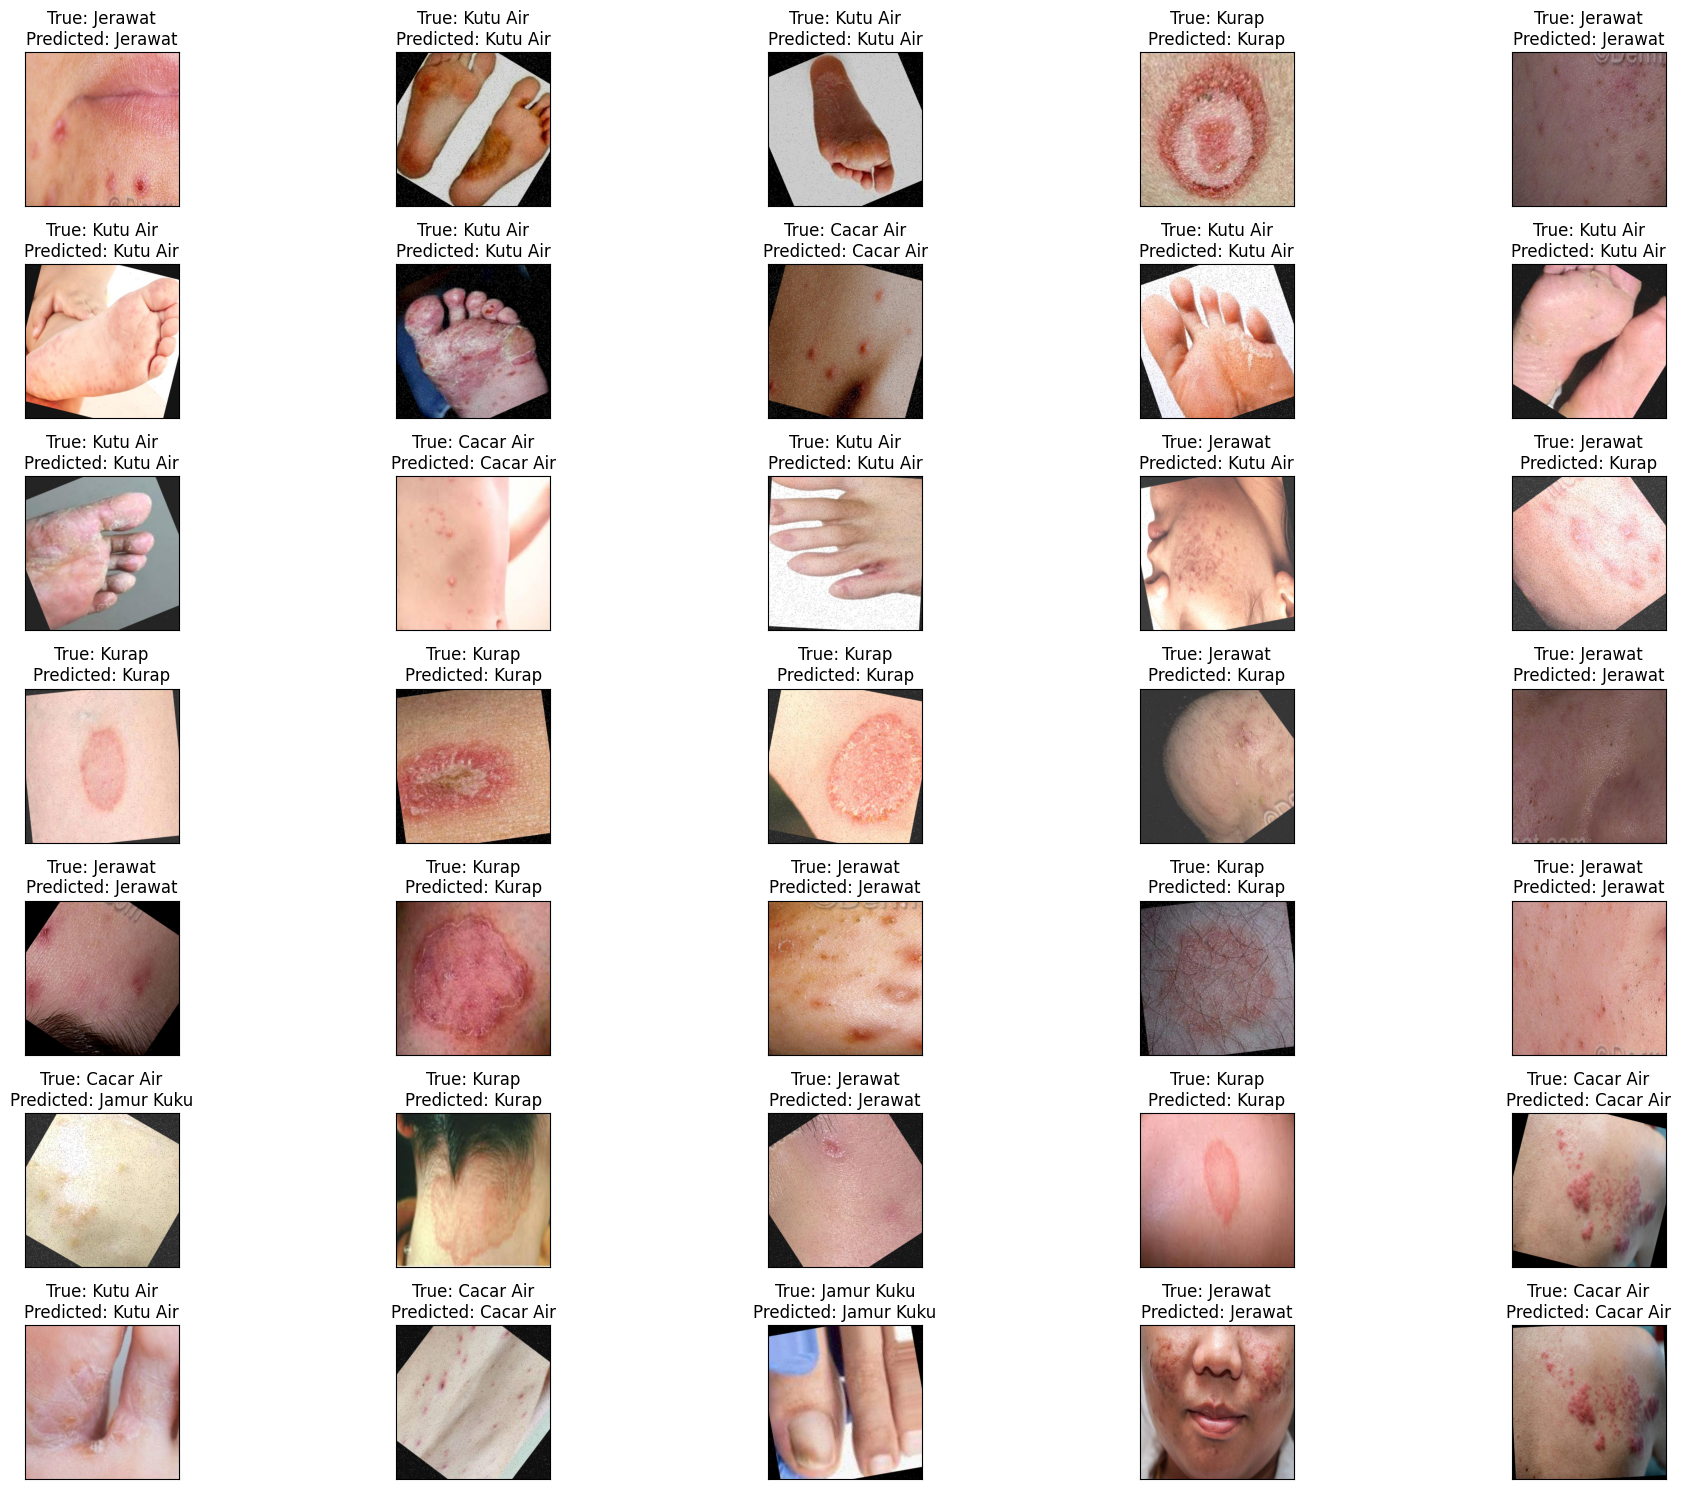

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {validasi_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display

# Define class labels
class_labels = ['Cacar Air', 'Kutu Air', 'Jamur Kuku', 'Jerawat', 'Kurap']

def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(416, 416))  # Adjusted size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
    return img_array

def predict_image(image_path):
    img_array = load_and_preprocess_image(image_path)
    single_prediction = densenet.predict(img_array)  # Use the correct model
    predicted_class = np.argmax(single_prediction, axis=1)
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label

# File upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
def on_file_upload_change(change):
    for filename, file_info in upload_widget.value.items():
        with open(filename, 'wb') as f:
            f.write(file_info['content'])
        # Display the uploaded image
        img = image.load_img(filename, target_size=(416, 416))  # Adjusted size
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        # Make a prediction
        predicted_label = predict_image(filename)
        print(f"Predicted Label for {filename}: {predicted_label}")

upload_widget.observe(on_file_upload_change, names='value')
display(upload_widget)

FileUpload(value={}, accept='image/*', description='Upload')